[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ignaziogallo/data-mining/blob/aa20-21/tutorials/tutorials/recommender-systems/Collaborative-Filtering-Recommender-Systems.ipynb)

# Collaborative filtering

**I like what you like**

We are going to start our exploration of <span style="color:red">recommendation systems</span>.   

## TODO
Analize "The Universal Recommender" http://predictionio.apache.org/gallery/template-gallery/

Used for:
- **Personalized recommendations**—user-based
- **Similar items**—item-based
- **Viewed this bought that**—item-based cross-action
- **Popular Items and User**-defined ranking
- **Item-set recommendations** for complimentarty purchases or shopping carts—item-set-based
- **Hybrid collaborative filtering** and content based recommendations—limited content-based

Recommendation systems are everywhere, from `Amazon`: 

<img src="figures/00-chapter2-amazon.png" width="50%">

to `last.fm` recommending music or concerts:

<img src="figures/00-chapter2-last.fm.png" width="50%">

## Amazon example
Amazon combines two bits of information to make a recommendation. 
* The first is that I viewed ``The Lotus Sutra`` translated by Gene Reeves; 
* the second, that customers who viewed that translation of the Lotus Sutra also viewed several other translations. 

The **recommendation method** we are looking at is called **collaborative filtering**. 
* It's called <font style="color:red">collaborative</font> because it makes recommendations **based on other people**
* Search among other users to find one that is similar
* Once I find that similar person I can see what she likes and recommend those objects

## How do I find someone who is similar?

A simple 2D explanation
* Suppose **users** rate **books** on a 5 star system
* We restrict our ratings to **two books** (2D case): 
  - Neal Stephenson's *Snow Crash* 
  - Steig Larsson's *The Girl with the Dragon Tattoo*.

First, here's a table showing **3 users** who rated these books


<img src="figures/00-chapter2-table-rating.png" width="60%">

<img src="figures/00-chapter2-similarity-2D.png" width="40%">

## Find the most similar person 
I would like to **recommend a book** to the mysterious **Ms. X** who rated 
* Snow Crash 4 stars 
* The Girl with the Dragon Tattoo 2 stars. 

To find the person who is **most similar, or closest**, to Ms. X.  
I do this by computing <font style="color:red">distance</font>.

### Manhattan Distance
The easiest distance measure to compute is what is called Manhattan Distance.

The distance, $d_{1}$, between two vectors $\mathbf {p}$, $\mathbf {q}$ in an $n$-dimensional real vector space
$$d_{1}(\mathbf {p} ,\mathbf {q} )=\|\mathbf {p} -\mathbf {q} \|_{1}=\sum _{i=1}^{n}|p_{i}-q_{i}|$$
where ($\mathbf {p}$ ,$\mathbf {q}$ ) are vectors
$\mathbf {p} =(p_{1},p_{2},\dots ,p_{n}){\text{ and }}\mathbf {q} =(q_{1},q_{2},\dots ,q_{n})\$

In the 2D case
* (x1, y1) might be Amy 
* (x2, y2) might be the elusive Ms. X. 

 Manhattan Distance is then calculated by
 $$|x_1 - x_2| + |y_1 - y_2|$$

So the Manhattan Distance for **Amy** and **Ms. X** is 4:

<img src="figures/00-chapter2-similarity-2D-2.png" width="40%">

Computing the distance between Ms. X and all three people gives us:


|Person |Distance from Ms. X|
|----|---|
|Amy| 4|
|Bill| 5|
|Jim| 5|

### The closest match
**Amy** is the closest match. 
* We can **look in her history** and see, for example, that 
  * she gave five stars to Paolo Bacigalupi's *The Windup Girl* 
* We would **recommend** that book to Ms. X.

* One benefit of **Manhattan Distance** is that it is **fast** to compute. 
* If we are Facebook and are trying to find the most similar person among one million users, **fast is good**.

### Euclidean Distance

If $\mathbf{p} = (p_1, p_2,..., p_n)$ and $\mathbf{q} = (q_1, q_2,..., q_n)$ are two points in Euclidean $n$-space, then the distance ($d_2$) from $\mathbf{p}$ to $\mathbf{q}$, or from $\mathbf{q}$ to $\mathbf{p}$ is given by the <font style="color:red">Pythagorean formula</font>:


$$
d_2(\mathbf{q} ,\mathbf{p} ) = \sqrt{(q_{1}-p_{1})^{2}+(q_{2}-p_{2})^{2}+\cdots +(q_{n}-p_{n})^{2}} ={\sqrt {\sum _{i=1}^{n}(q_{i}-p_{i})^{2}}}.
$$

### Pythagorean Theorem

<img src="figures/00-chapter2-similarity-2D-pitagora.png" width="40%">

### Euclidean distance between Ms. X and Amy
$$\sqrt{(5 - 2)^2 + (5 - 4)^2} = \sqrt{3^2 + 1^2} = \sqrt{10} = 3.16$$

Computing the rest of the distances we get

| Person |Distance from Ms. X|
|----|---|
|Amy| 3.16|
|Bill| 3.61|
|Jim| 3.61|

## N-dimensional thinking

Suppose we work for an online streaming music service and we want to make the experience more compelling by **recommending bands**.  
Let's say users can rate bands on a star system 0-5 stars and they can give **half star ratings** (for 
example, you can give a band 2.5 stars).  
The following chart shows **8 users** and their ratings of **8 bands**.

| Band | Angelica| Bill | Chan | Dan | Hailey | Jordyn | Sam | Veronica |
|----|---|---|---|---|---|---|---|---|
| Blues Traveler | 3.5 |2| 5| 3| - |-| 5 |3|
| Broken Bells | 2| 3.5| 1| 4 |4 |4.5| 2 |-|
| Deadmau5 | - |4 |1| 4.5 |1 |4 |-| -|
| Norah Jones | 4.5| - |3 |-| 4| 5| 3| 5|
| Phoenix | 5 | 2 | 5 | 3| -| 5| 5| 4|
| Slightly Stoopid | 1.5| 3.5| 1| 4.5| -| 4.5| 4 |2.5|
| The Strokes | 2.5 |- |- |4 |4 |4 |5| 3|
| Vampire Weekend | 2| 3| -| 2| 1| 4| -| -|

### The Manhattan Distance

|Band|Angelica| Bill| Difference|
|----|---|---|---|
|Blues Traveler| 3.5| 2| 1.5|
|Broken Bells| 2| 3.5| 1.5|
|Deadmau|5| - |- |
|Norah Jones| 4.5| -| -|
|Phoenix |5| 2| 3|
|Slightly Stoopid |1.5| 3.5| 2|
|The Strokes |2.5 |-| -|
|Vampire Weekend |2 |3| 1|
|**Manhattan Distance**:|- | -|9|

### The Euclidean Distance

|Band|Angelica| Bill| Difference|Difference$^2$|
|----|---|---|---|---|
|Blues Traveler| 3.5| 2| 1.5| 2.25|
|Broken Bells| 2| 3.5| 1.5| 2.25|
|Deadmau|5| - |4| -|
|Norah Jones| 4.5| -|-|- |
|Phoenix |5| 2| 3| 9|
|Slightly Stoopid |1.5| 3.5| 2|4|
|The Strokes |2.5 |-| -|-|
|Vampire Weekend |2 |3| 1|1|
|Sum of squares|-|-|-|18.5|
|**Euclidean Distance**:|-|- |-|4.3|

To parse that out a bit more:
$$Euclidean = \sqrt{(3.5−2)^2 +(2− 3.5)^2 +(5−2)^2+(1.5− 3.5)^2+(2− 3)^2}$$
            $$= \sqrt{1.52+(−1.5)^2+ 3^2+(−2)^2+1^2}$$
            $$= \sqrt{2.25+2.25+9+ 4+1}$$
            $$= \sqrt{18.5} $$
            $$= 4.3$$

### A flaw: missing values

It looks like we discovered a flaw with using these distance measures.  
* Computing the distance between **Hailey** and **Veronica**, we noticed they **only rated two bands in common** (Norah Jones and The Strokes), 
* whereas when we computed the distance between **Hailey** and **Jordyn**, we noticed they rated **five bands in common**. 
* This seems to skew our distance measurement, since the Hailey-Veronica distance is in 2 dimensions while the Hailey-Jordyn distance is in 5 dimensions. 

* Manhattan Distance and Euclidean Distance work best when there are **no missing values**. 

## A generalization of distance

We can generalize Manhattan Distance and Euclidean Distance to what is called the 
**Minkowski Distance** Metric:
$$d(x, y) = (\sum_{k=1}^n | x_k − y_k |^r)^{1/r}$$

When
- r = 1: The formula is Manhattan Distance.
- r = 2: The formula is Euclidean Distance
- r = ∞: Supremum Distance

## Some code

Representing the data using Python's dictionary:

In [1]:
users = {"Angelica": {"Blues Traveler": 3.5, "Broken Bells": 2.0, 
                      "Norah Jones": 4.5, "Phoenix": 5.0, 
                      "Slightly Stoopid": 1.5, 
                      "The Strokes": 2.5, "Vampire Weekend": 2.0}, 
         "Bill":     {"Blues Traveler": 2.0, "Broken Bells": 3.5, 
                      "Deadmau5": 4.0, 
                      "Phoenix": 2.0, "Slightly Stoopid": 3.5, 
                      "Vampire Weekend": 3.0}, 
         "Chan":     {"Blues Traveler": 5.0, "Broken Bells": 1.0, 
                      "Deadmau5": 1.0, "Norah Jones": 3.0, 
                      "Phoenix": 5, "Slightly Stoopid": 1.0}, 
         "Dan":      {"Blues Traveler": 3.0, "Broken Bells": 4.0, 
                      "Deadmau5": 4.5, "Phoenix": 3.0, 
                      "Slightly Stoopid": 4.5, "The Strokes": 4.0, 
                      "Vampire Weekend": 2.0}, 
         "Hailey":   {"Broken Bells": 4.0, "Deadmau5": 1.0, 
                      "Norah Jones": 4.0, "The Strokes": 4.0, 
                      "Vampire Weekend": 1.0}, 
         "Jordyn":   {"Broken Bells": 4.5, "Deadmau5": 4.0, "Norah Jones": 5.0, 
                      "Phoenix": 5.0, "Slightly Stoopid": 4.5, 
                      "The Strokes": 4.0, "Vampire Weekend": 4.0}, 
         "Sam":      {"Blues Traveler": 5.0, "Broken Bells": 2.0, 
                      "Norah Jones": 3.0, "Phoenix": 5.0, 
                      "Slightly Stoopid": 4.0, "The Strokes": 5.0}, 
         "Veronica": {"Blues Traveler": 3.0, "Norah Jones": 5.0, 
                      "Phoenix": 4.0, "Slightly Stoopid": 2.5, 
                      "The Strokes": 3.0}}

We can get the ratings of a particular user as follows:

In [2]:
users["Veronica"]

{'Blues Traveler': 3.0,
 'Norah Jones': 5.0,
 'Phoenix': 4.0,
 'Slightly Stoopid': 2.5,
 'The Strokes': 3.0}

### The code to compute Manhattan distance

I'd like to write a function that computes the Manhattan distance as follows:

In [4]:
def manhattan(rating1, rating2): 
    """Computes the Manhattan distance. Both rating1 and rating2 are 
    dictionaries of the form {'The Strokes': 3.0, 'Slightly 
    Stoopid': 2.5}"""
    distance = 0 
    commonRatings = False

    for key in rating1: 
        if key in rating2: 
            distance += abs(rating1[key] - rating2[key]) 
            commonRatings = True
    if commonRatings: 
        return distance 
    else: 
        return -1 #Indicates no ratings in common

To test the function:

In [5]:
manhattan(users['Hailey'], users['Veronica']) 

2.0

In [6]:
manhattan(users['Hailey'], users['Jordyn'])

7.5

### Find the closest person
A function that returns a sorted list with the closest person first:

In [7]:
def compute_nearest_neighbor(username, users):
    """
    creates a sorted list of users based on their distance to username
    """ 
    distances = [] 
    for user in users: 
        if user != username: 
            distance = manhattan(users[user], users[username]) 
            distances.append((distance, user)) 
            print("Distance(%s, %s) = %f"%(username,user,distance))
    # sort based on distance -- closest first
    distances.sort() 
    return distances

In [8]:
compute_nearest_neighbor('Hailey', users)

Distance(Hailey, Dan) = 4.500000
Distance(Hailey, Jordyn) = 7.500000
Distance(Hailey, Veronica) = 2.000000
Distance(Hailey, Angelica) = 5.000000
Distance(Hailey, Chan) = 4.000000
Distance(Hailey, Sam) = 4.000000
Distance(Hailey, Bill) = 5.500000


[(2.0, 'Veronica'),
 (4.0, 'Chan'),
 (4.0, 'Sam'),
 (4.5, 'Dan'),
 (5.0, 'Angelica'),
 (5.5, 'Bill'),
 (7.5, 'Jordyn')]

###  Make recommendations
* We find `Hailey` nearest neighbor (`Veronica` in this case). 
* We will then **find** `bands that Veronica has rated but Hailey has not`. Also, 
* For example, 
  * Hailey has **not rated** the great band `Phoenix`. 
  * Veronica has **rated** `Phoenix` a '4' so we will assume Hailey is likely to enjoy the band as well. 
  
Here is a function to make recommendations.

In [9]:
def recommend(username, users):
    """
    Give list of recommendations
    """
    # first find nearest neighbor
    nearest = compute_nearest_neighbor(username, users)[0][1] 
    print("nearest neighbor:", nearest)
    recommendations = [] 
    # now find bands neighbor rated that user didn't 
    neighborRatings = users[nearest] 
    userRatings = users[username] 
    for artist in neighborRatings: 
        if not artist in userRatings:
            recommendations.append((artist, neighborRatings[artist]))
    recommendations.sort(key=lambda artistTuple: artistTuple[1], reverse = True)
    return recommendations

In [10]:
recommend('Hailey', users)

Distance(Hailey, Dan) = 4.500000
Distance(Hailey, Jordyn) = 7.500000
Distance(Hailey, Veronica) = 2.000000
Distance(Hailey, Angelica) = 5.000000
Distance(Hailey, Chan) = 4.000000
Distance(Hailey, Sam) = 4.000000
Distance(Hailey, Bill) = 5.500000
nearest neighbor: Veronica


[('Phoenix', 4.0), ('Blues Traveler', 3.0), ('Slightly Stoopid', 2.5)]

That fits with our expectations. 
* As we saw above, `Hailey`'s nearest neighbor was `Veronica` and Veronica gave `Phoenix` a '**4**'. 

Let's try a few more:

In [11]:
recommend('Chan', users) 

Distance(Chan, Dan) = 14.000000
Distance(Chan, Jordyn) = 12.000000
Distance(Chan, Veronica) = 6.500000
Distance(Chan, Angelica) = 4.500000
Distance(Chan, Sam) = 4.000000
Distance(Chan, Bill) = 14.000000
Distance(Chan, Hailey) = 4.000000
nearest neighbor: Hailey


[('The Strokes', 4.0), ('Vampire Weekend', 1.0)]

We think `Chan` will like `The Strokes`

In [12]:
recommend('Sam', users) 

Distance(Sam, Dan) = 7.500000
Distance(Sam, Jordyn) = 6.000000
Distance(Sam, Veronica) = 8.500000
Distance(Sam, Angelica) = 8.000000
Distance(Sam, Chan) = 4.000000
Distance(Sam, Bill) = 8.000000
Distance(Sam, Hailey) = 4.000000
nearest neighbor: Chan


[('Deadmau5', 1.0)]

We predict that `Sam` will not like `Deadmau5`.

In [13]:
recommend('Angelica', users) 

Distance(Angelica, Dan) = 9.000000
Distance(Angelica, Jordyn) = 9.500000
Distance(Angelica, Veronica) = 3.500000
Distance(Angelica, Chan) = 4.500000
Distance(Angelica, Sam) = 8.000000
Distance(Angelica, Bill) = 9.000000
Distance(Angelica, Hailey) = 5.000000
nearest neighbor: Veronica


[]

Hmm. For Angelica we got back an **empty set** meaning we have **no recommendations** for her.  
Let us see what went wrong:

In [14]:
compute_nearest_neighbor('Angelica', users) 

Distance(Angelica, Dan) = 9.000000
Distance(Angelica, Jordyn) = 9.500000
Distance(Angelica, Veronica) = 3.500000
Distance(Angelica, Chan) = 4.500000
Distance(Angelica, Sam) = 8.000000
Distance(Angelica, Bill) = 9.000000
Distance(Angelica, Hailey) = 5.000000


[(3.5, 'Veronica'),
 (4.5, 'Chan'),
 (5.0, 'Hailey'),
 (8.0, 'Sam'),
 (9.0, 'Bill'),
 (9.0, 'Dan'),
 (9.5, 'Jordyn')]

Angelica's nearest neighbor is Veronica.  
When we look at their ratings:

* We see that **Angelica rated every band that Veronica did**. 
* We have no new ratings, so no recommendations. 

<div class="alert alert-success">
    
## Practice 
1. Compute the Minkowski Distance and replace the Manhattan distance
2. Compare some test results using different values for the "$r$" parameter
</div>

In [ ]:
# write your code here

## User-Based Collaborative Filtering
* To experiment with recommendation algorithms, we need **data** that contains a set of items and a set of users who have reacted to some of the items.
* User-Based Collaborative Filtering simply put uses the "wisdom of the crowd" to recommend items. 
* Item based collaborative filtering uses the patterns of **users who liked the movie that I like, also liked these other movies**. 
* Recommendation based on user's input of any movie present in the dataset is done.
* [There are a lot of datasets available to the public](https://github.com/caserec/Datasets-for-Recommender-Systems)

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

%matplotlib inline

### Create the rating-based Utility Matrix

In [2]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('./data/ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')

In [3]:
n_users = ratings['user_id'].unique().shape[0]
n_movies = ratings['movie_id'].unique().shape[0]
print("Num. users:", n_users, "\nNum. movies:", n_movies)

Num. users: 943 
Num. movies: 1682


In [4]:
ratings_matrix = ratings.pivot_table(index=['user_id'],columns=['movie_id'],values='rating').reset_index(drop=True)
ratings_matrix.fillna( 0, inplace = True )

ratings_matrix.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


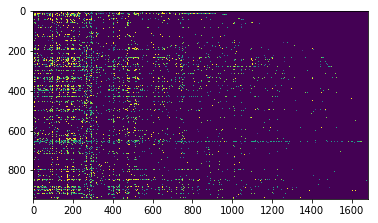

In [5]:
plt.imshow(ratings_matrix, interpolation='nearest');

### Compute users similarities
* Cosine Similarity
* In `pairwise_distances` the shape of the ratings_matrix should be (`n_samples_X`, `n_features`) = (`n_users`, `n_movies`).

In [7]:
user_similarity = 1 - pairwise_distances( ratings_matrix.values, metric="cosine" )
np.fill_diagonal( user_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
users_similarity_matrix = pd.DataFrame( user_similarity )
users_similarity_matrix.head(5)

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,0.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
1,0.166931,0.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
2,0.047460,0.110591,0.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
3,0.064358,0.178121,0.344151,0.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
4,0.378475,0.072979,0.021245,0.031804,0.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941


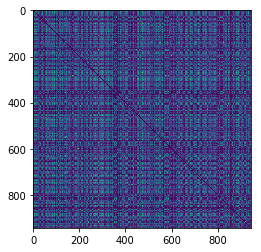

In [8]:
plt.imshow(users_similarity_matrix, interpolation='nearest');

### Read items info

In [9]:
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('./data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5), encoding='latin-1')

In [10]:
# utility function to extract movie's title from ID
def movie_index_to_title(idx):
    return movies.loc[movies.movie_id == idx, 'title'].values[0]

#### We can compare the ratings about two movies  

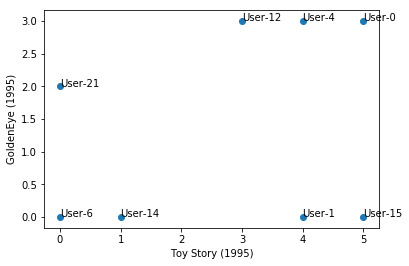

In [60]:
m1 = 1
m2 = 2
title1 = movie_index_to_title(m1)
title2 = movie_index_to_title(m2)
users = [0,1,4,6,12,14,15,21]
x_rating = ratings_matrix[[m1]].loc[users]
y_rating = ratings_matrix[[m2]].loc[users]

fig, ax = plt.subplots()
ax.scatter(x_rating, y_rating)
ax.set_xlabel(title1)
ax.set_ylabel(title2)
# annotate data points
for i, u in enumerate(users):
    ax.annotate("User-%d"%u, (x_rating.iloc[i].values[0], y_rating.iloc[i].values[0]))

### Recommender Engine

* After you have determined a list of users similar to a **user U** , you need to calculate the **rating R** that **user U** would give to a certain **item I**. 
* Again, just like similarity, you can do this in multiple ways.
* You can **predict** that a **user’s rating $R_{Up}$** for an item $p$ will be close to the **average** of the ratings given to $p$ by the top $n=5$ or top 10 users most similar to $U$. 
* The mathematical formula for the average rating given by n users would look like this:
$$R_{Up} = \frac{1}{n}\sum_{u=1}^nR_{up}$$

In [62]:
N = 5   # first N most similar users
user = 6 # user ID
sorted_sim = users_similarity_matrix.sort_values(by=[user], ascending = False )[0:N].iloc[:, user]
sorted_sim

649    0.653364
312    0.633602
405    0.627633
233    0.625723
307    0.625592
Name: 6, dtype: float64

In [63]:
most_similar_users = list(sorted_sim.index)
similarities = list(sorted_sim.values)
print("most_similar_users to user", user, ":",most_similar_users)
print("similarities:", similarities)

most_similar_users to user 6 : [649, 312, 405, 233, 307]
similarities: [0.6533638903675445, 0.6336023800671677, 0.6276332175480571, 0.6257228539441237, 0.6255916734046745]


In [64]:
item = 1
movie_title = movie_index_to_title(item)
print('Movie title:', movie_title)

Movie title: Toy Story (1995)


In [65]:
# calculate the rating R that U would give to a certain item I
ratings_ui = [ratings_matrix.iloc[x, item] for x in  most_similar_users]
print("ratings of similar users:", ratings_ui)
avg = sum(ratings_ui)/(0.01 + sum(x > 0 for x in ratings_ui))
print("PREDICTION: the rating that user %d would give to the item '%s' is %d" % (user, movie_title, round(avg,2)))

ratings of similar users: [3.0, 0.0, 0.0, 2.0, 0.0]
PREDICTION: the rating that user 6 would give to the item 'Toy Story (1995)' is 2


#### Weighted average rating
* There will be situations where the N similar users that you found are not equally similar to the target user U.
* The weighted average using the **similarity factor S** can help us
$$R_U = \left( \sum_{u=1}^nR_u S_u\right) / \sum_{u=1}^nS_u$$
* With a weighted average, you give more consideration to the **ratings of similar users** in order of their similarity.

In [66]:
print("ratings of similar users:", ratings_ui)
print("similarities between users:", similarities)
dot_prod = sum([x*y for x,y in zip(ratings_ui, similarities)])
avg = dot_prod / sum(similarities)
print("PREDICTION: the rating that user %d would give to the item '%s' is %d" % (user, movie_title, round(avg,2)))

ratings of similar users: [3.0, 0.0, 0.0, 2.0, 0.0]
similarities between users: [0.6533638903675445, 0.6336023800671677, 0.6276332175480571, 0.6257228539441237, 0.6255916734046745]
PREDICTION: the rating that user 6 would give to the item 'Toy Story (1995)' is 1


<div class="alert alert-success">
    
## Practice 
1. Build a new Recommender Engine, by adding to the Weighted average rating the average of all the user's ratings
2. Compare some test results
</div>

In [67]:
# write your code here


## Item-Based Collaborative Filtering
* For an **item I**, with a set of **similar items** determined based on rating vectors consisting of received user ratings, 
* the rating by a user U, who hasn’t rated it, is found by picking out N items from the similarity list that have been rated by U and calculating the rating based on these N ratings.
* Intuition: `Two items are similar if they are rated in the same way by many users`.

### Compute items similarities
* Cosine Similarity

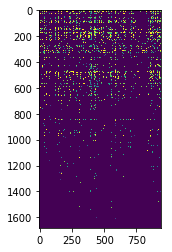

In [68]:
items_ratings_matrix = ratings.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
items_ratings_matrix.fillna( 0, inplace = True )

plt.imshow(items_ratings_matrix, interpolation='nearest');

In [69]:
item_similarity = 1 - pairwise_distances( items_ratings_matrix.values, metric="cosine" )
np.fill_diagonal( item_similarity, 0 ) #Filling diagonals with 0s for future use when sorting is done
items_similarity_matrix = pd.DataFrame( item_similarity )
items_similarity_matrix.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,0.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,...,0.035387,0.0,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
1,0.402382,0.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
2,0.330245,0.273069,0.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,...,0.000000,0.0,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
3,0.454938,0.502571,0.324866,0.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,...,0.000000,0.0,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
4,0.286714,0.318836,0.212957,0.334239,0.000000,0.037299,0.334769,0.259161,0.272448,0.055453,...,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211


### Recommender Engine
* After you have determined a list of items similar to a **item I** , you need to calculate the **rating $R_{UI}$** that **user U** would give to a certain **item I**. 
* You can **predict** a **user’s rating $R_{UI}$** for an item I  
  * Finding the set of **most similar items $p$ to item I** that have been rated by user U.
  * Aggregating their ratings $R_{Up}$ to predict the rating for $R_{UI}$ item $I$
* The mathematical formula for the average rating given by n users would look like this:
$$R_{UI} = \frac{1}{n}\sum_{p=1}^nR_{Up}$$

In [70]:
N = 10   # first N most similar items
item = 1 # Item ID
sorted_sim = items_similarity_matrix.sort_values(by=[item], ascending = False )[0:N].iloc[:, item]
sorted_sim

232    0.659619
160    0.623544
384    0.617274
402    0.616143
61     0.604969
575    0.601960
225    0.597083
230    0.595684
549    0.590124
95     0.584100
Name: 1, dtype: float64

In [71]:
movie_title = movie_index_to_title(item) 
print('Movie title:', movie_title)

Movie title: Toy Story (1995)


In [72]:
most_similar_items = list(sorted_sim.index)
similarities = list(sorted_sim.values)
print("most_similar_items to movie ''", movie_title, "'':",[movie_index_to_title(i) for i in most_similar_items])
print("similarities:", similarities)

most_similar_items to movie '' Toy Story (1995) '': ['Young Guns (1988)', 'Glengarry Glen Ross (1992)', 'Naked Gun 33 1/3: The Final Insult (1994)', 'Ghost (1990)', 'Three Colors: White (1994)', "City Slickers II: The Legend of Curly's Gold (1994)", '101 Dalmatians (1996)', 'Star Trek IV: The Voyage Home (1986)', 'Rob Roy (1995)', 'Aladdin (1992)']
similarities: [0.6596186220255105, 0.6235435842660795, 0.617273683459067, 0.6161431166917779, 0.6049690376155201, 0.6019595420661139, 0.5970826652116645, 0.595684463428062, 0.5901235125559376, 0.5841003612680911]


In [73]:
user = 4
# calculate the rating R that U would give to a certain item I
ratings_ui = [items_ratings_matrix.iloc[x, user] for x in  most_similar_items]
print("ratings of similar items:", ratings_ui)
avg = sum(ratings_ui)/(0.01 + sum(x > 0 for x in ratings_ui))
print("PREDICTION: the rating that user %d would give to the item '%s' is %d" % (user, movie_title, round(avg,2)))

ratings of similar items: [4.0, 0.0, 4.0, 3.0, 4.0, 0.0, 3.0, 2.0, 0.0, 0.0]
PREDICTION: the rating that user 4 would give to the item 'Toy Story (1995)' is 3


<div class="alert alert-success">
    
## Practice 
1. Build a new Recommender Engine, by changing the similarity metric ('jaccard', 'correlation', 'cityblock', 'euclidean', 'minkowski'). See more [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html).
2. Compare some test results
</div>

In [74]:
# write your code here
